# Aprendizagem e Extração de Conhecimento 

### Classificação do nível salarial anual de um indíviduo, relativamente a características de funcionários de múltiplas empresas

Com este trabalho pretende-se analisar e preparar um conjunto de dados como referido acima, desenvolvendo modelos predicativos, melhorando através da validação e da optimização dos mesmos. Será utilizado Python, acompanhado pelas funcionalidades disponíveis na biblioteca Sklearn. 

Este documento será acompanhado por um relatório, tendo apenas breves explicações para ajudar na navegação deste documento e do desenvolvimento da solução para o problema da previsão do nível salarial.


## Análise do dataset

Neste dataset, referente a caractéristicas de funcionários que iremos descrever mais abaixo, está dividido em dois, treino e teste. Começaremos por analisar o dataset de treino e todas as mudanças que dizermos a este dataset, iremos aplicar ao dataset de teste. 

Assim, é de notar que o dataset de **treino** tem 32560 dados sobre funcionários, enquanto que o dataset de **teste** tem 16280. 
Nesta secção iremos analisar os 15 atributos presentes neste dataset e perceber que informação podemos retirar dos dados fornecidos. 

* **Age**: variável continua que indica a idade do funcionário;
* **Workclass**: indica a classe a que o funcionario pertencente, podendo *serPrivate, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay e Never-worked*;
* **Fnlwgt**: variável continua que indica o peso final, ou seja, o numero de unidades que o funcionário representa na população do dataset;
* **Education**: indica a formação que o funcionário tem em termos académicos, podendo ser *Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th ou Preschool*;
* **Education-num**: variável continua que indica a formação que o funcionário tem, em número;
* **Marital status**: indica o estado cívil do funcionário, podendo ser *Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent ou Married-AF-spouse*;
* **Ocupation**: indica o trabalho do funcionário, podendo ter diferentes valores, dos quais, *Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv ou Armed-Forces*:
* **Relationship**: indica o papel no relacionamento que o funcionário tem, podendo ser *Wife, Own-child, Husband, Not-in-family, Other-relative ou Unmarried*;
* **Race**: indica a etnia dos funcionários, podendo ser *White, Asian-Pac-Islander, Amer-Indian-Eskimo, Black ou Other*;
* **Sex**: indica o género do funcionário, podendo ser *Male ou Female*;
* **Capital-gain**: variável contínua que indica o ganho de capital do funcionário, em investimentos;
* **Capital-loss**: variável contínua que indica a perda de capital do funcionário, em investimentos;
* **Hours-per-week**: variável contínua que indica o número de horas que o funcionário trabalhou, por semana;
* **Native-country**: indica o país de origem do funcionário, podendo ser *United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US (Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad\&Tobago, Peru, Hong ou Holand-Netherlands*;
* **Salary-classification**: por fim, mas não menos importante, temos a nossa classe de previsão, o salário do funcionário. Será o resultado desta coluna que iremos querer prever, em relação às características dos funcionários e informações acima referidas;

### Import de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pandas.api.types import CategoricalDtype

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score,roc_curve,f1_score,recall_score,precision_score


%matplotlib inline

### Leitura de dados

Leitura do dataset para começar uma análise mais minusciosa do dataset, neste caso de treino.

In [2]:
train_data = pd.read_csv('train_data.csv', header = 0, sep = ";" , index_col=False, na_values = ' ?' )

train_data.rename(columns={' workclass':'workclass',' fnlwgt':'fnlwgt',' education': 'education',' education-num':'educationNum',
                   ' marital-status':'maritalStatus',' occupation':'occupation',' relationship':'relationship',
                   ' race':'race',' sex':'sex',' capital-gain':'capitalG', ' capital-loss':'capitalL',' hours-per-week':'hoursPerWeek',
                   ' native-country':'nativeCountry',' salary-classification':'salary'},
          inplace=True)

test_data = pd.read_csv('test_data.csv', header = 0, sep = ";" , index_col=False, na_values = ' ?' )

test_data.rename(columns={' workclass':'workclass',' fnlwgt':'fnlwgt',' education': 'education',' education-num':'educationNum',
                   ' marital-status':'maritalStatus',' occupation':'occupation',' relationship':'relationship',
                   ' race':'race',' sex':'sex',' capital-gain':'capitalG', ' capital-loss':'capitalL',' hours-per-week':'hoursPerWeek',
                   ' native-country':'nativeCountry',' salary-classification':'salary'},
          inplace=True)

### Informação sobre os atributos

Informação pertinente sobre os atributos do dataset e descrição das colunas com valores do tipo inteiro.

In [3]:
train_data.info()

test_data.info()

train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            32561 non-null  int64 
 1   workclass      30725 non-null  object
 2   fnlwgt         32561 non-null  int64 
 3   education      32561 non-null  object
 4   educationNum   32561 non-null  int64 
 5   maritalStatus  32561 non-null  object
 6   occupation     30718 non-null  object
 7   relationship   32561 non-null  object
 8   race           32561 non-null  object
 9   sex            32561 non-null  object
 10  capitalG       32561 non-null  int64 
 11  capitalL       32561 non-null  int64 
 12  hoursPerWeek   32561 non-null  int64 
 13  nativeCountry  31978 non-null  object
 14  salary         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 

age        fnlwgt  educationNum      capitalG      capitalL  \
count  32561.000000  3.256100e+04  32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05     10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05      2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04      1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05      9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05     10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05     12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06     16.000000  99999.000000   4356.000000   

       hoursPerWeek  
count  32561.000000  
mean      40.437456  
std       12.347429  
min        1.000000  
25%       40.000000  
50%       40.000000  
75%       45.000000  
max       99.000000

### Dados categóricos

É possível ver que não existem missing values nas colunas do tipo inteiro e podemos analisar acima os intervalos de valores das mesmas. Iremos mais tarde visualizar estes valores em gráficos para compreender melhor o nosso dataset. 

Destaca-se ainda que existiam *missing values* nas colunas workclass, occupation e nativeCountry. Iremos perceber quantos dados estão em falta e analisar os diferentes valores que as colunas do tipo object apresentam neste dataset. 

In [4]:
object_columns = train_data.select_dtypes(include=["object"]).columns

print("Contagem dos diferentes valores das colunas categóricas:")

for x in range(len(object_columns)):
    print("\n*---------- {} ----------*\n".format(object_columns[x]))
    print(train_data[object_columns[x]].value_counts()) 

Contagem dos diferentes valores das colunas categóricas:

*---------- workclass ----------*

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

*---------- education ----------*

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

*---------- maritalStatus ----------*

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent     

In [5]:
train_data.isnull().sum()

age                 0
workclass        1836
fnlwgt              0
education           0
educationNum        0
maritalStatus       0
occupation       1843
relationship        0
race                0
sex                 0
capitalG            0
capitalL            0
hoursPerWeek        0
nativeCountry     583
salary              0
dtype: int64

## Visualização de dados

Aqui será onde iremos visualizar gráficamente ou não, os dados fornecidos, percebendo que tipo de ações terão de ser feitas no dataset para, posteriormente, sermos capazes de treinar o nosso modelo.  

In [6]:
num_attributes = train_data.select_dtypes(include=['int64'])

cat_attributes = train_data.select_dtypes(include=['object'])

print("Colunas com valores do tipo inteiro:\n")

print(num_attributes.columns)

print("\nColunas com valores do tipo object:\n")

print(cat_attributes.columns)


Colunas com valores do tipo inteiro:

Index(['age', 'fnlwgt', 'educationNum', 'capitalG', 'capitalL',
       'hoursPerWeek'],
      dtype='object')

Colunas com valores do tipo object:

Index(['workclass', 'education', 'maritalStatus', 'occupation', 'relationship',
       'race', 'sex', 'nativeCountry', 'salary'],
      dtype='object')


### Distribuição de dados do tipo inteiro

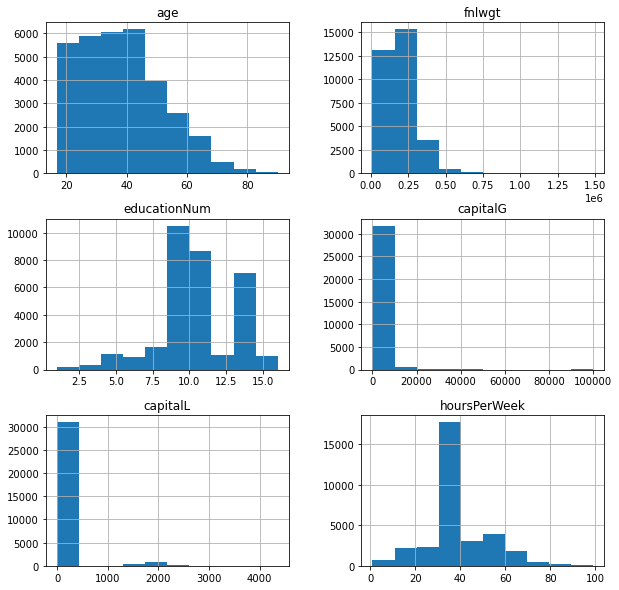

In [7]:
num_attributes.hist(figsize=(10,10))
plt.rc('xtick', labelsize=10)     
plt.rc('ytick', labelsize=10)

plt.show()

### Missing values e correlação entre atributos do tipo inteiro

<AxesSubplot:>

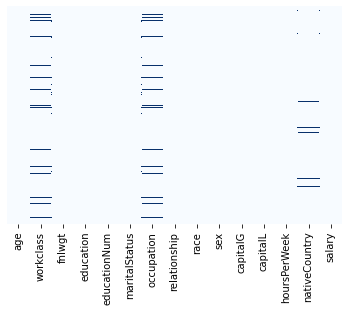

In [8]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='Blues')

<AxesSubplot:>

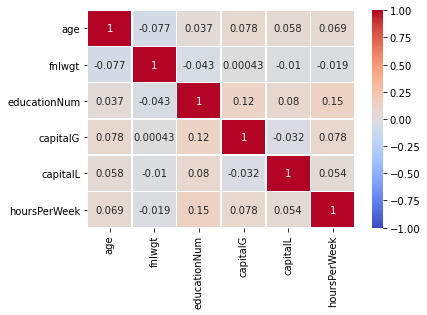

In [9]:
sns.heatmap(train_data.corr(), annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, linewidths=.5)

### Distribuição do número de indivíduos pela sua classe salarial

<AxesSubplot:xlabel='salary', ylabel='count'>

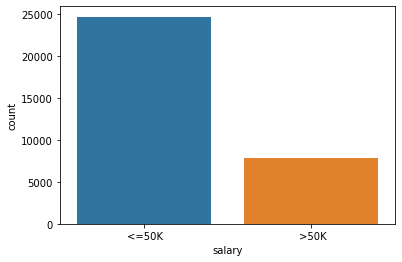

In [10]:
sns.countplot(x = train_data['salary'])

### Diagramas de bigodes para avaliar a variação dos dados do nosso dataset

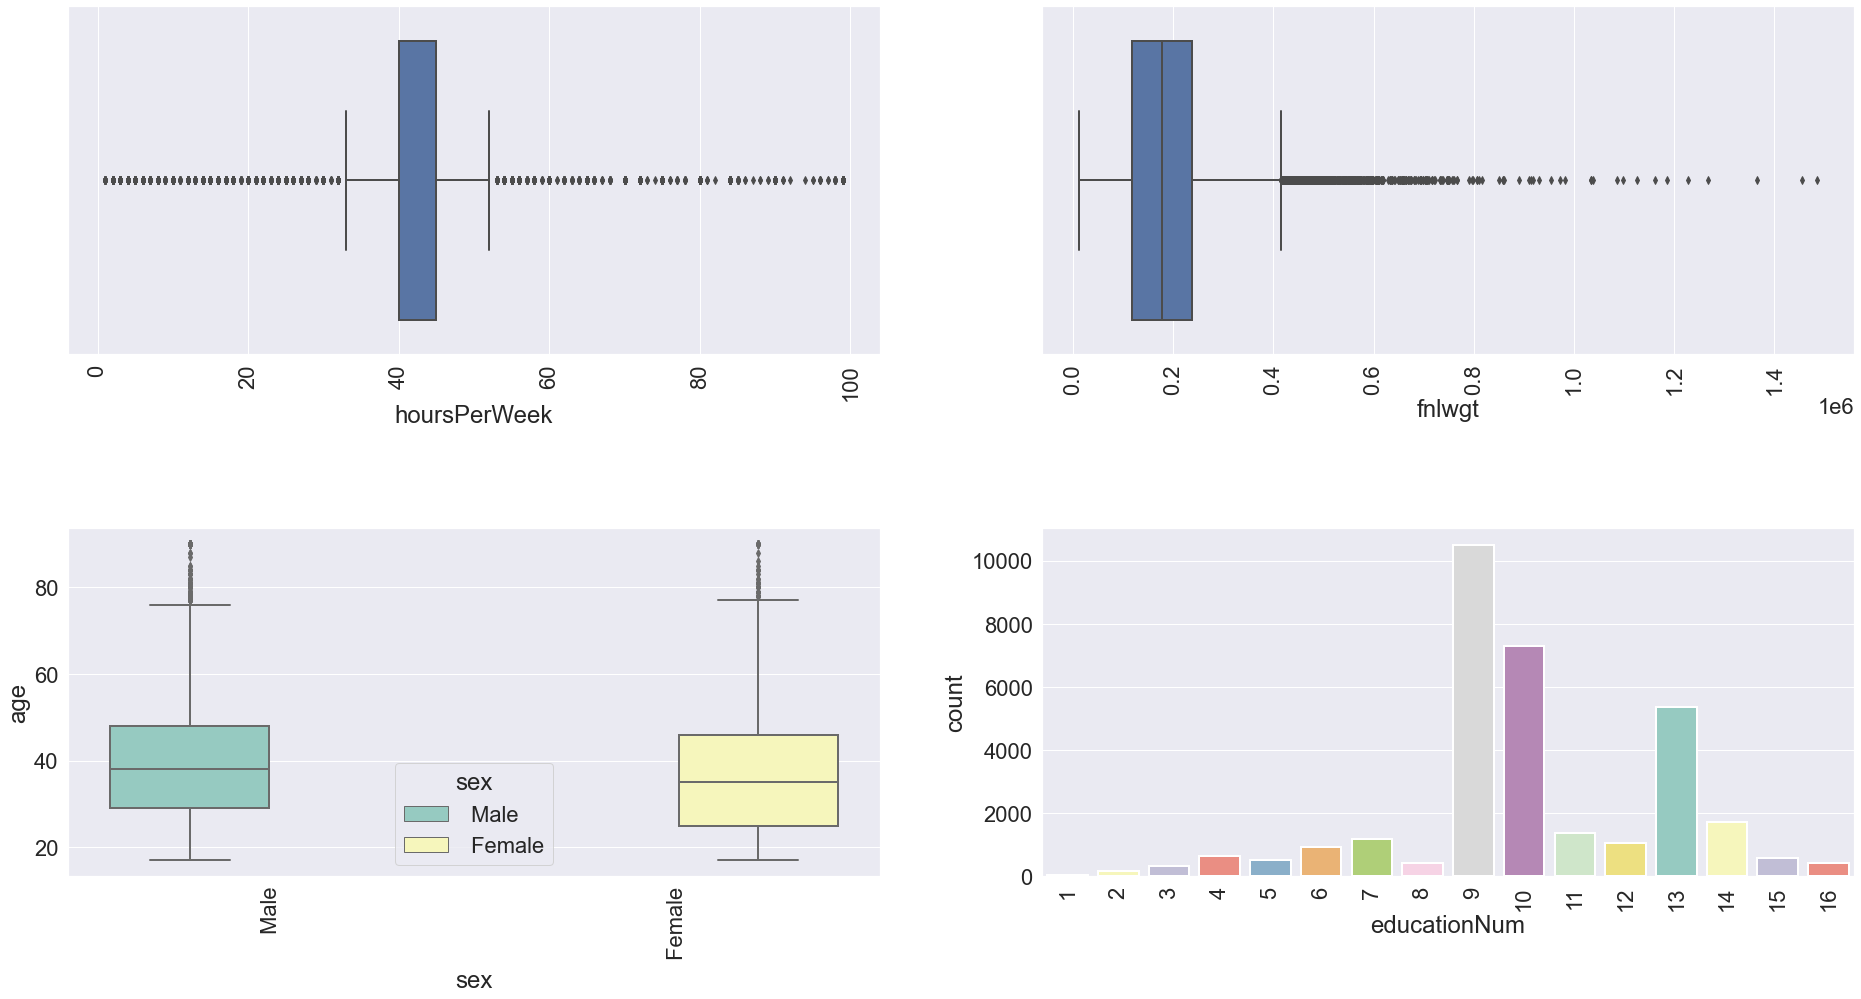

In [11]:
sns.set(font_scale=2)
plt.figure(figsize=(32,16))

plt.subplot(221)
sns.boxplot(x= train_data.hoursPerWeek, linewidth=2)
plt.xticks(rotation=90)

plt.subplot(222)
sns.boxplot(x = train_data.fnlwgt, linewidth=2)
plt.xticks(rotation=90)

plt.subplot(223)
sns.boxplot(x= train_data.sex, y= train_data.age, hue=train_data.sex, orient="v", palette="Set3", linewidth=2)
plt.xticks(rotation=90)

plt.subplot(224)
sns.countplot(x = train_data.educationNum, palette="Set3", linewidth=2)
plt.xticks(rotation=90)

plt.subplots_adjust(hspace=0.5) 
plt.show()

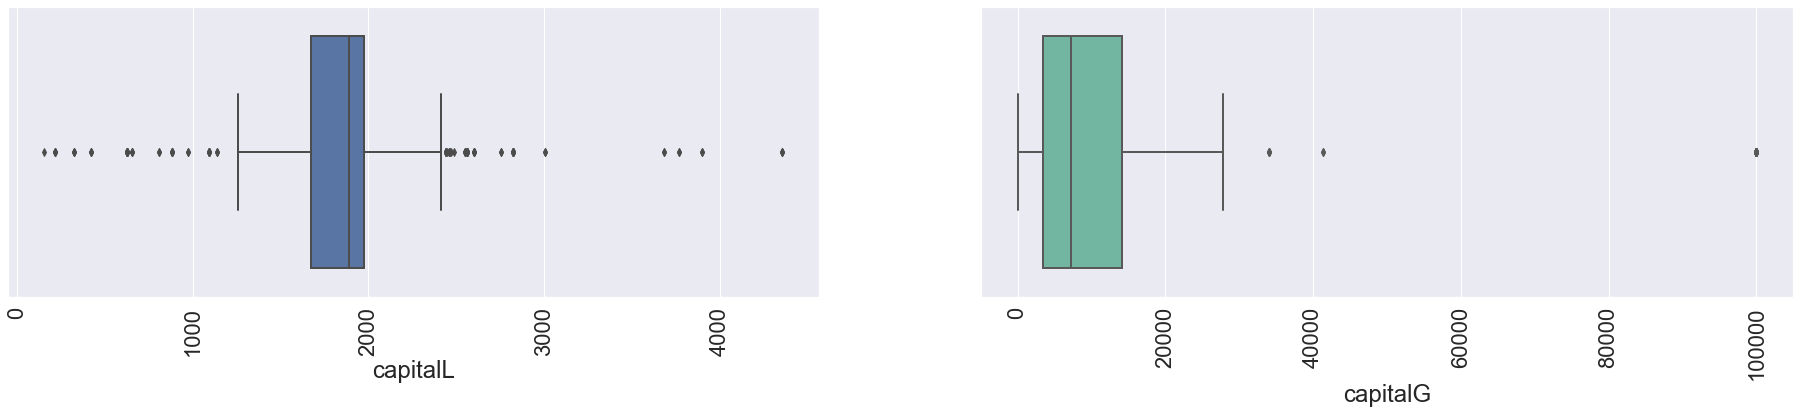

In [12]:
# Como temos muitos 0's nos dados, os gráficos eram praticamente ilegiveis. Consequentemente, foram retirados esses outliers
# para ajudar na visualização gráfica do capital gain e loss. 
capital_loss_noZeros = train_data.loc[(train_data["capitalL"] != 0) ,:]
capital_gain_noZeros = train_data.loc[(train_data["capitalG"] != 0) ,:]

sns.set(font_scale=2)
plt.figure(figsize=(32,16))

plt.subplot(221)
sns.boxplot(x= capital_loss_noZeros["capitalL"], linewidth=2)
plt.xticks(rotation=90)

plt.subplot(222)
sns.boxplot(x = capital_gain_noZeros["capitalG"], palette="Set2", linewidth=2)
plt.xticks(rotation=90)

plt.subplots_adjust(hspace=1) 
plt.show()

### Gráficos com a contagem do número de indivíduos por coluna de dados categórios

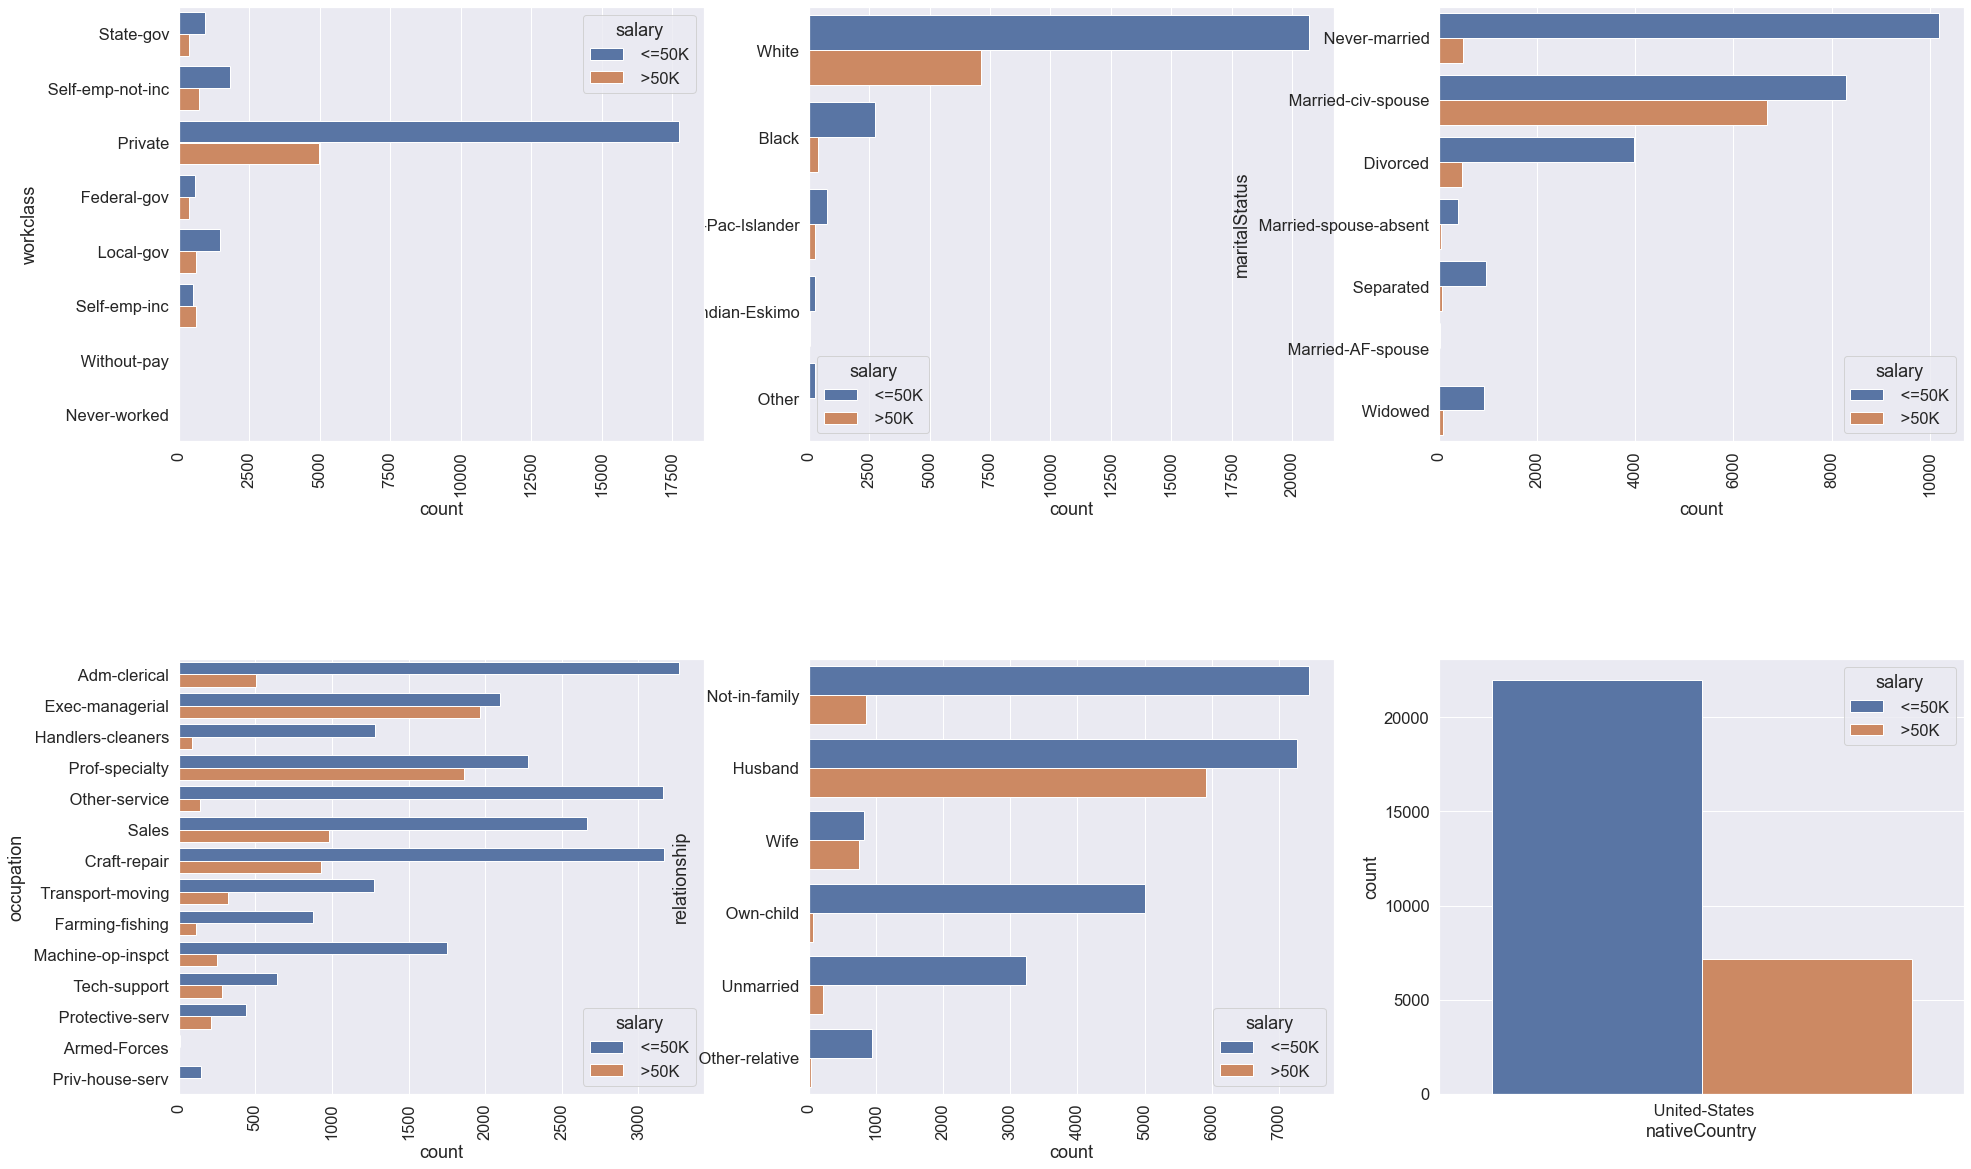

In [13]:
sns.set(font_scale=1.5)
plt.figure(figsize=(32,32)) 

plt.subplot(332)
sns.countplot(y='race', hue='salary', data = cat_attributes)
plt.xticks(rotation=90)

plt.subplot(331)
sns.countplot(y='workclass', hue='salary', data = cat_attributes)
plt.xticks(rotation=90) 

plt.subplot(333)
sns.countplot(y='maritalStatus', hue='salary', data = cat_attributes)
plt.xticks(rotation=90)

plt.subplot(334)
sns.countplot(y='occupation', hue='salary', data = cat_attributes)
plt.xticks(rotation=90)

plt.subplot(335)
sns.countplot(y='relationship', hue='salary', data = cat_attributes)
plt.xticks(rotation=90)

#Pais com mais afluência no nosso dataset, daí o estudo isolado do próprio
plt.subplot(336)
usaPeople = train_data.loc[(train_data["nativeCountry"] == " United-States") ,:]
sns.countplot( x = usaPeople.nativeCountry,  hue='salary', data = cat_attributes )

plt.subplots_adjust(hspace=0.5) 
plt.show()

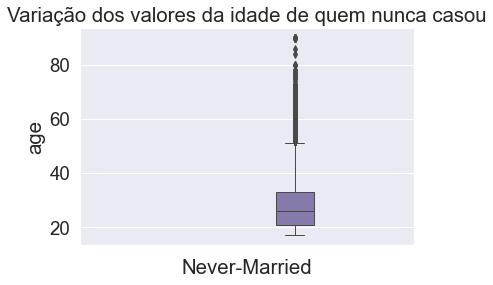

In [89]:
neverMarriedAge = train_data.loc[(train_data["maritalStatus"] == " Never-married") ,:]
neverMarriedAge

gNA = sns.boxplot(x = neverMarriedAge.maritalStatus, y = neverMarriedAge.age, linewidth=1)
gNA.set(xticklabels=[])
gNA.set(xlabel = "Never-Married")
gNA.set_title("Variação dos valores da idade de quem nunca casou")
plt.show()

In [90]:
neverMarriedAge.describe()

age  educationNum      capitalG     capitalL  hoursPerWeek  \
count  9726.000000   9726.000000   9726.000000  9726.000000   9726.000000   
mean     28.461444     10.009870    383.834362    52.180136     37.235863   
std       9.953377      2.399594   3813.077785   306.734229     12.302791   
min      17.000000      1.000000      0.000000     0.000000      1.000000   
25%      21.000000      9.000000      0.000000     0.000000     30.000000   
50%      26.000000     10.000000      0.000000     0.000000     40.000000   
75%      33.000000     12.000000      0.000000     0.000000     40.000000   
max      90.000000     16.000000  99999.000000  3683.000000     99.000000   

            salary      capitalB  
count  9726.000000   9726.000000  
mean      0.048324    331.654226  
std       0.214461   3830.627789  
min       0.000000  -3683.000000  
25%       0.000000      0.000000  
50%       0.000000      0.000000  
75%       0.000000      0.000000  
max       1.000000  99999.000000

### Gráfico da classe salarial e do país de nascimento (excluindo USA por ser a maior amostra de longe)

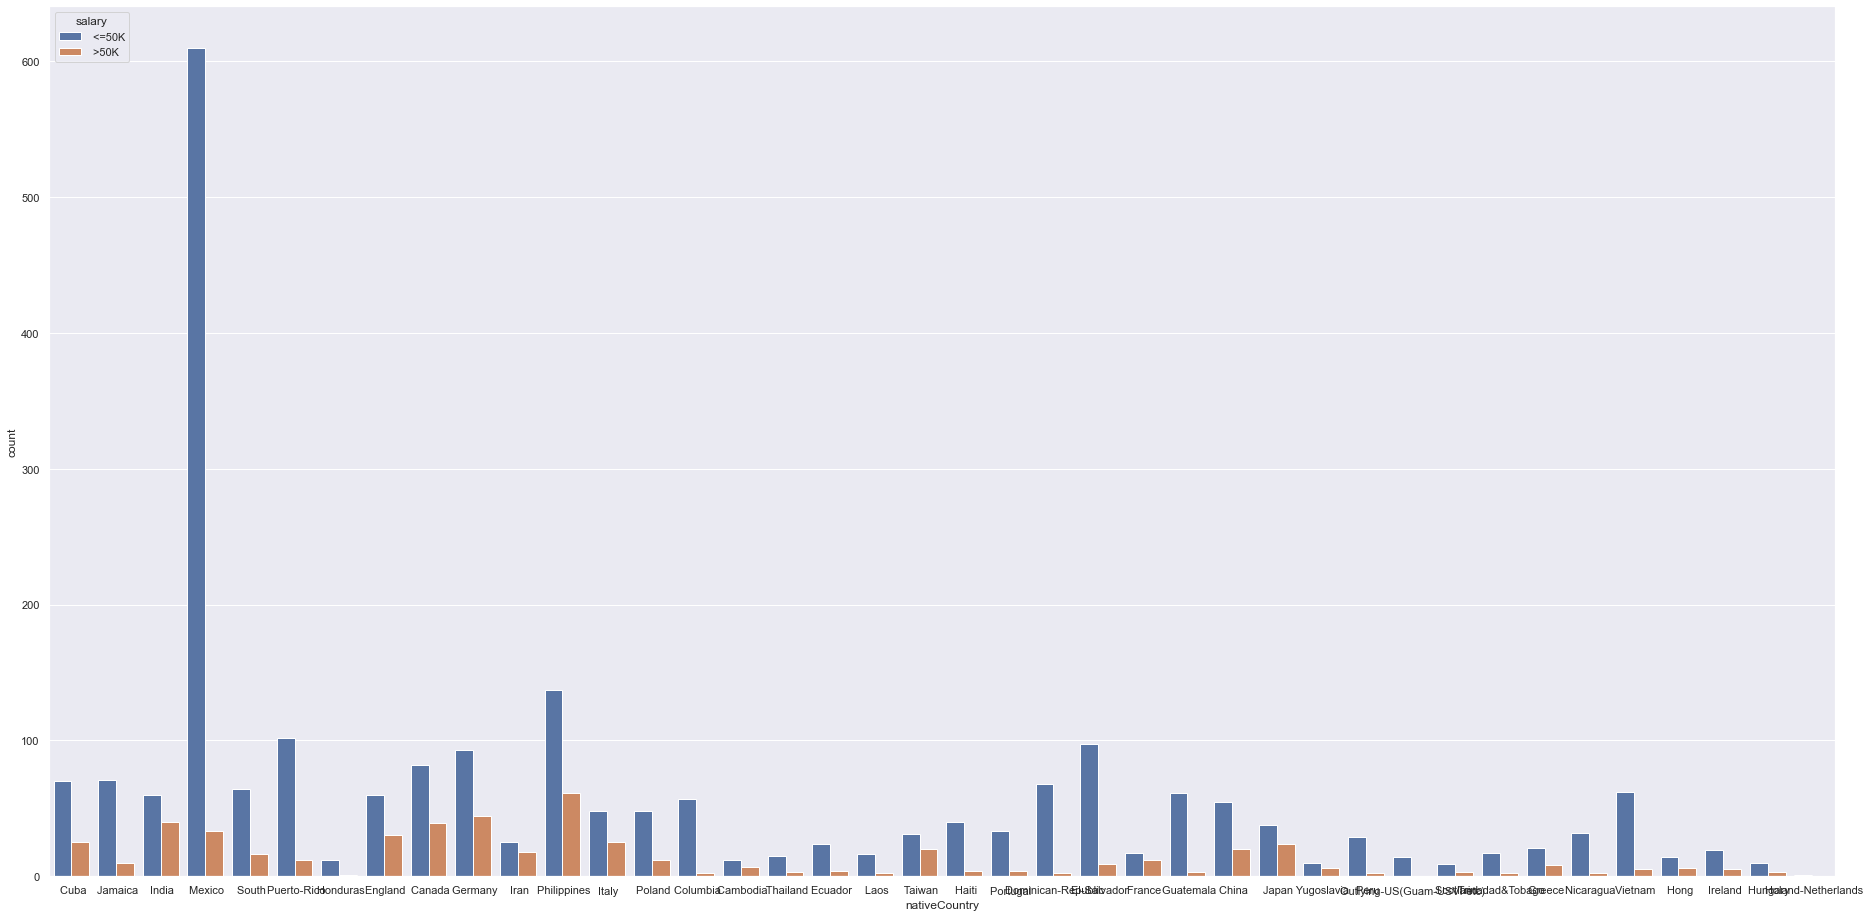

In [14]:
sns.set(font_scale = 1)
plt.figure(figsize=(32,16))

#Este estudo serve apenas para comparar com a distribuição de valores do salario entre os diversos paises e os USA. 
nusaPeople = train_data.loc[(train_data["nativeCountry"] != " United-States") ,:]

sns.countplot( x = nusaPeople.nativeCountry,  hue='salary', data = cat_attributes )

plt.show()

### Gráfico da classe salarial pelo EducationNum

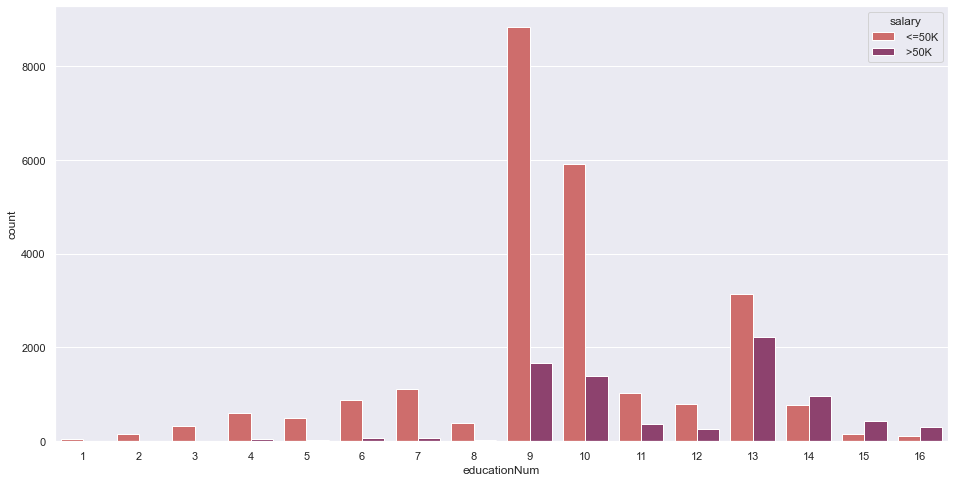

In [15]:
sns.set(font_scale=1)
plt.figure(figsize=(16,8))

sns.countplot(x=train_data.educationNum , hue = train_data.salary , data = cat_attributes, palette = "flare")
plt.show()

### Gráfico da classe salarial pelas horas feitas por semana, excluindo alguns outliers para melhor visualização

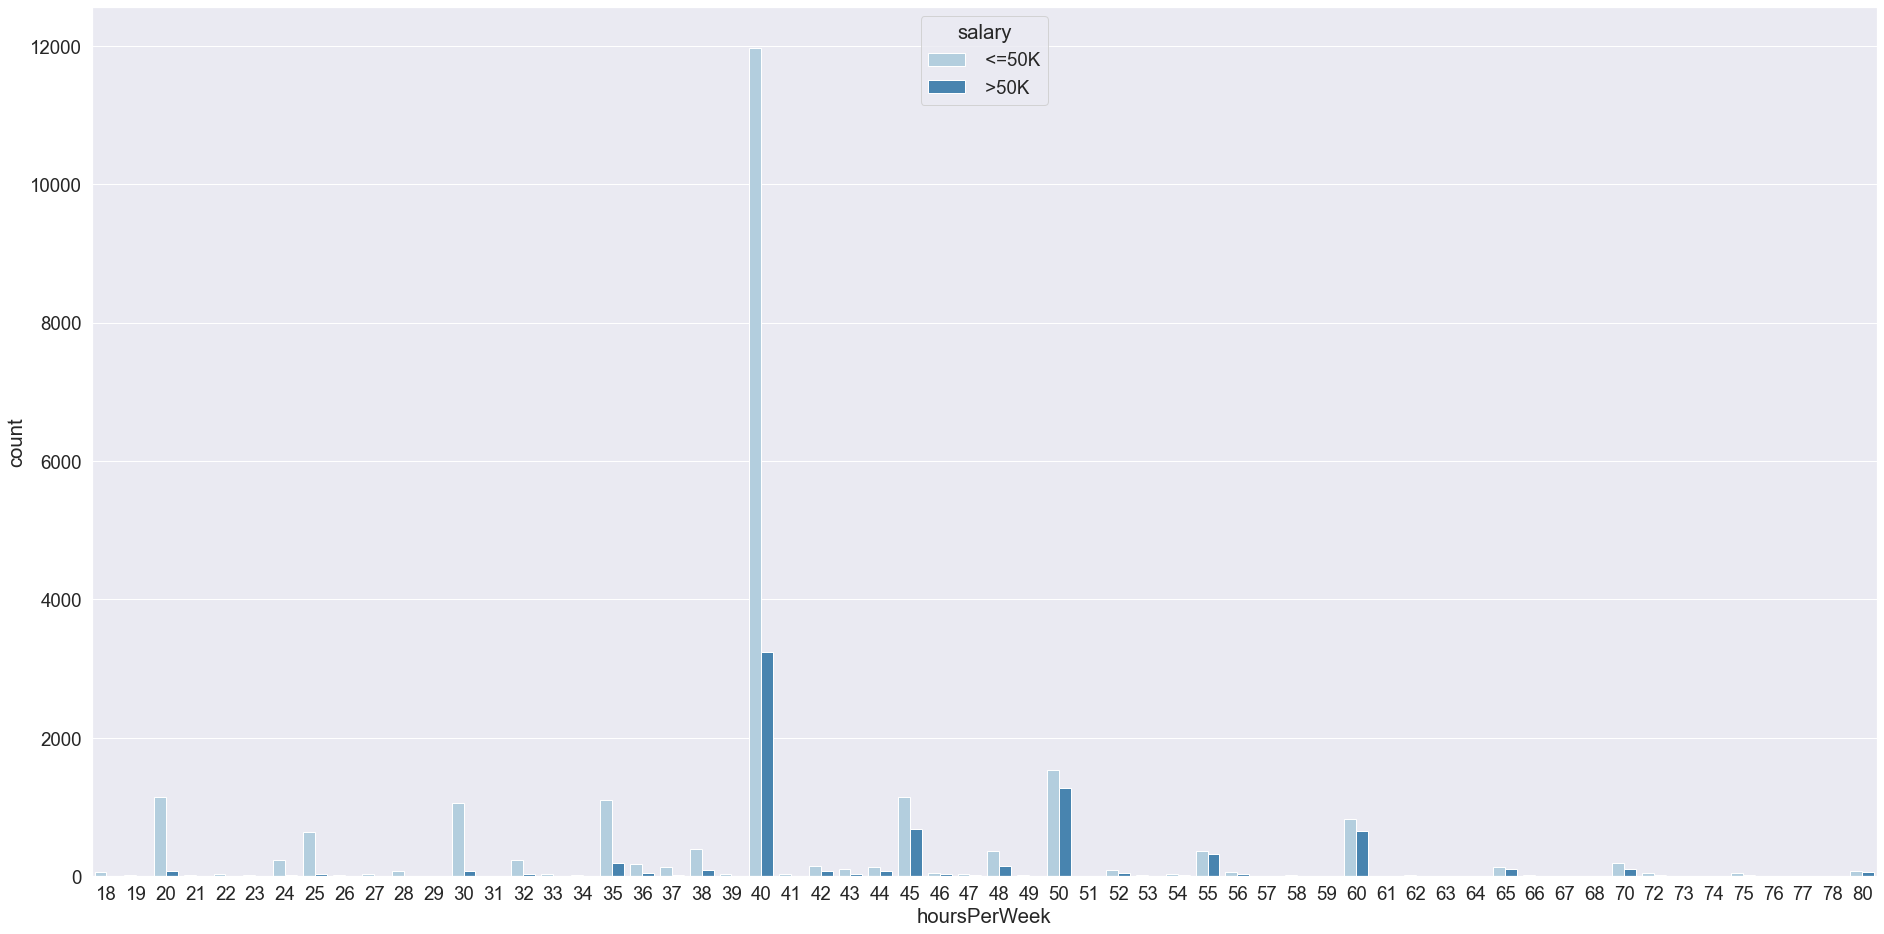

In [16]:
sns.set(font_scale = 1.7)
plt.figure(figsize=(32,16))

reduzirHoras = train_data.loc[(train_data["hoursPerWeek"] <= 80 ) ,:]
reduzirHoras = reduzirHoras.loc[(train_data["hoursPerWeek"] >= 18 ) ,:]

sns.countplot(x=reduzirHoras.hoursPerWeek , hue = train_data.salary , data = num_attributes, palette = "Blues")

plt.show()

## Preparação do dataset 

Para que, no futuro, os nossos modelos sejam capazes de prever a classe salarial de um indíviduo com uma melhor precisão, é necessário que o nosso dataset seja ajustado. Assim, após a analise inicial do dataset, realizada anteriormente, decidimos que o nosso dataset deveria refletir as seguintes alterações:
- A coluna correspondente ao sexo deverá passar a ser representado através de um boolean. Male é repesentado pelo valor 1 e Female pelo valor 0.
- A coluna correspondente ao salário deverá passar a ser representado através de um boolean. Mais que 50k é representado pelo valor 1 e menos que 50k é representado pelo valor 0
- Utilizar o pd.get_dummies para converter os atributos do tipo categorico em valores do tipo numérico, mantendo a informação dos mesmos. Deste modo, foi criado, para cada valor único destes atributos uma nova coluna no nosso dataset. Estas colunas assumem um valor 0 ou 1 atendendo às caracteriscas do indíviduo relativas a esse atríbuto. 
- Removemos a coluna Education, uma vez que se trata de uma coluna do tipo categórico que já se encontra representada no dataset através da coluna Education-Num que é do tipo numérico, ou seja, já está pronta a ser usada pelos modelos de treino e previsão.
- Removemos a coluna fnlwgt uma vez que não é claro a forma como esta é calculada nem de que modo poderá afetar a nossa previsão.
- Removemos as colunas Capital Gain e Capital Loss mantendo a informação nelas presentes. Criando uma nova coluna, chamada CapitalB que reflete o balanço final dos investimentos que foram feitos pelo funcionário.
- Demos cast a algumas colunas para *category*, para ajudar a interpretação de alguns modelos.

In [17]:
train_data = train_data.drop(['fnlwgt', 'education'], axis=1)

test_data = test_data.drop(['fnlwgt', 'education'], axis = 1)

test_data.head(5)

age   workclass  educationNum        maritalStatus          occupation  \
0   25     Private             7        Never-married   Machine-op-inspct   
1   38     Private             9   Married-civ-spouse     Farming-fishing   
2   28   Local-gov            12   Married-civ-spouse     Protective-serv   
3   44     Private            10   Married-civ-spouse   Machine-op-inspct   
4   18         NaN            10        Never-married                 NaN   

  relationship    race      sex  capitalG  capitalL  hoursPerWeek  \
0    Own-child   Black     Male         0         0            40   
1      Husband   White     Male         0         0            50   
2      Husband   White     Male         0         0            40   
3      Husband   Black     Male      7688         0            40   
4    Own-child   White   Female         0         0            30   

    nativeCountry  salary  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States    >50K  
3   United-States    >50K  
4   United-States   <=50K

In [18]:
train_data.dropna(axis = 0, how = 'any', subset =['workclass', 'occupation', 'nativeCountry'], inplace = True)

test_data.dropna(axis = 0, how = 'any', subset =['workclass', 'occupation', 'nativeCountry'], inplace = True)

In [19]:
train_data["salary"] = train_data["salary"].apply(lambda x:0 if x == " <=50K" else 1 )

test_data["salary"] = test_data["salary"].apply(lambda x:0 if x == " <=50K" else 1 )

train_data["sex"] = train_data["sex"].apply(lambda x:0 if x == " Female" else 1 )

test_data["sex"] = test_data["sex"].apply(lambda x:0 if x == " Female" else 1 )

In [20]:
train_data['capitalB'] = train_data.apply(lambda row: (row.capitalG - row.capitalL) , axis = 1)

test_data['capitalB'] = test_data.apply(lambda row: (row.capitalG - row.capitalL) , axis = 1)

new_order = ['age', 'workclass', 'educationNum', 'maritalStatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalB', 'hoursPerWeek',
       'nativeCountry', 'salary']

test_data.reindex( columns = new_order )

train_data.reindex( columns = new_order ).head(10)

age          workclass  educationNum           maritalStatus  \
0   39          State-gov            13           Never-married   
1   50   Self-emp-not-inc            13      Married-civ-spouse   
2   38            Private             9                Divorced   
3   53            Private             7      Married-civ-spouse   
4   28            Private            13      Married-civ-spouse   
5   37            Private            14      Married-civ-spouse   
6   49            Private             5   Married-spouse-absent   
7   52   Self-emp-not-inc             9      Married-civ-spouse   
8   31            Private            14           Never-married   
9   42            Private            13      Married-civ-spouse   

           occupation    relationship    race  sex  capitalB  hoursPerWeek  \
0        Adm-clerical   Not-in-family   White    1      2174            40   
1     Exec-managerial         Husband   White    1         0            13   
2   Handlers-cleaners   Not-in-family   White    1         0            40   
3   Handlers-cleaners         Husband   Black    1         0            40   
4      Prof-specialty            Wife   Black    0         0            40   
5     Exec-managerial            Wife   White    0         0            40   
6       Other-service   Not-in-family   Black    0         0            16   
7     Exec-managerial         Husband   White    1         0            45   
8      Prof-specialty   Not-in-family   White    0     14084            50   
9     Exec-managerial         Husband   White    1      5178            40   

    nativeCountry  salary  
0   United-States       0  
1   United-States       0  
2   United-States       0  
3   United-States       0  
4            Cuba       0  
5   United-States       0  
6         Jamaica       0  
7   United-States       1  
8   United-States       1  
9   United-States       1

In [21]:
train_data.sex = train_data.sex.astype('category')

train_data.workclass = train_data.workclass.astype('category')

train_data.relationship = train_data.relationship.astype('category')

train_data.maritalStatus = train_data.maritalStatus.astype('category')

train_data.race = train_data.race.astype('category')

test_data.sex = test_data.sex.astype('category')

test_data.workclass = test_data.workclass.astype('category')

test_data.relationship = test_data.relationship.astype('category')

test_data.maritalStatus = test_data.maritalStatus.astype('category')

test_data.race = test_data.race.astype('category')

train_data.dtypes

age                 int64
workclass        category
educationNum        int64
maritalStatus    category
occupation         object
relationship     category
race             category
sex              category
capitalG            int64
capitalL            int64
hoursPerWeek        int64
nativeCountry      object
salary              int64
capitalB            int64
dtype: object

In [22]:
train_data_new = train_data.copy()

test_data_new = test_data.copy()

train_data_new = pd.get_dummies(train_data_new,columns=["workclass","occupation","maritalStatus",
                                                        "relationship","race","nativeCountry"])

test_data_new = pd.get_dummies(test_data_new,columns=["workclass","occupation","maritalStatus",
                                                       "relationship","race","nativeCountry"])

#na limpeza dos missing values, perdeu-se no dataset de test a coluna native_country_ Holand-Netherlands e decidimos limpar
#também essa coluna no dataset de treino porque em nada condiciona o nosso modelo
train_data_new.drop(['nativeCountry_ Holand-Netherlands'], axis=1, inplace = True)

## Treino de modelos 

É nesta fase que iremos começar o treino e teste dos nossos modelos.
Escolhemos modelos de classificação supervisionados para o problema que temos em questão. Todos estes modelos que poderão ser vistos abaixo sofreram uma otimização nos parametros para obter a melhor acurácia possível. 
Também foi usado um StackingClassifier para tentar obter melhores resultados na previsão do nosso modelo. 

Todos os resultados do treino e teste de modelos, bem como do tunning dos mesmos, podem ser vistos abaixo e serão analisados posteriormente com as respetivas matrizes de confusão e resultados da métrica acurácia.

Estudamos ainda o atributo Feature Importance, para além das métricas usadas anteriormente para avaliar a performance dos modelos, percebendo que peso os nossos modelos atribuem aos diferentes atributos do dataset para o seu treino. Sendo críticos relativamente ao impacto dos mesmos no contexto do problema que estamos a estudar, testamos a performance dos nossos modelos após retirarmos alguns atributos do dataset. Contudo, esta ação tornou os modelos menos precisos, pelo que retrocedemos o processo, retirando apenas as features "fnlgwt" e "Education".

In [23]:
X_train = train_data_new.drop(columns = ['salary'], axis = 1)
Y_train = train_data_new['salary']

X_test = test_data_new.drop(columns = ['salary'], axis = 1)
Y_test = test_data_new['salary']

### Decision Tree Classifier

In [24]:
# DECISION TREE

clf = DecisionTreeClassifier(
                            criterion = "entropy" ,
                            min_samples_split = 2,
                            random_state = 0,
                            max_depth = 10,
                            max_leaf_nodes = 93
                            ).fit(X_train, Y_train) #num computador dá 93 noutro da 62 

clf.score(X_train, Y_train)

predclf = clf.predict(X_test)

print(confusion_matrix(Y_test, predclf))

print('\n')

print(classification_report(Y_test, predclf))

[[10768   592]
 [ 1579  2121]]


              precision    recall  f1-score   support

           0       0.87      0.95      0.91     11360
           1       0.78      0.57      0.66      3700

    accuracy                           0.86     15060
   macro avg       0.83      0.76      0.78     15060
weighted avg       0.85      0.86      0.85     15060



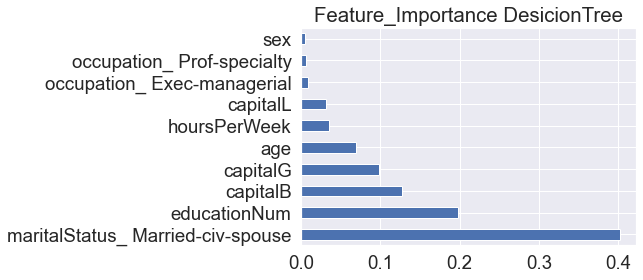

In [25]:
feat_importancesclf = pd.Series(clf.feature_importances_, index=X_train.columns).nlargest(10).plot(kind='barh')

plt.title("Feature_Importance DesicionTree")
plt.show()

### Support Vector Classifier

In [26]:
#SUPPORT VECTOR MACHINE
svm = SVC(
         kernel = "rbf", 
         C = 1, 
         gamma = "scale", 
         tol = 1e-4 
         ).fit(X_train, Y_train)

svm.score(X_train, Y_train)

predsvm = svm.predict(X_test)

print(confusion_matrix(Y_test, predsvm))

print('\n')

print(classification_report(Y_test, predsvm))

[[10997   363]
 [ 2703   997]]


              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.73      0.27      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060



### K-Neighbors Classifier

Corremos um teste para perceber o melhor valor do parâmetro "n_neighbors", similar ao teste feito na unidade curricular.

In [27]:
#K-NEIGHBORS 

knn = KNeighborsClassifier(
                          n_neighbors=22
                          ).fit(X_train, Y_train)

knn.score(X_train, Y_train)

predKnn = knn.predict(X_test)

print(confusion_matrix(Y_test, predKnn))

print('\n')

print(classification_report(Y_test, predKnn))

[[10619   741]
 [ 1453  2247]]


              precision    recall  f1-score   support

           0       0.88      0.93      0.91     11360
           1       0.75      0.61      0.67      3700

    accuracy                           0.85     15060
   macro avg       0.82      0.77      0.79     15060
weighted avg       0.85      0.85      0.85     15060



In [28]:
#K-NEIGHBORS best K test per error rate 

# error_rate = []

# # Teste de valores de k, de 1 a 40, para ver quando o erro estabiliza e que valor de k se adequa melhor ao nosso dataset.
# for i in range(1,40):
#     knn2 = KNeighborsClassifier(n_neighbors=i)
#     knn2.fit(X_train,Y_train)
#     pred_i = knn2.predict(X_test)
#     error_rate.append(np.mean(pred_i != Y_test))

# plt.figure(figsize=(10,6))
# plt.plot(range(1,40),error_rate,color='green', linestyle='dashed', marker='o',
#          markerfacecolor='blue', markersize=10)
# plt.title('Error Rate vs. K Value')
# plt.xlabel('K')
# plt.ylabel('Error Rate')

### Gaussian Naive Bayes Classifier

In [29]:
# GAUSSIAN NB
#
gnb = GaussianNB(
                var_smoothing=1e-09
                ).fit(X_train, Y_train)

gnb.score(X_train, Y_train)

predGNB = gnb.predict(X_test)

print(confusion_matrix(Y_test, predGNB))

print('\n')

print(classification_report(Y_test, predGNB))

[[10155  1205]
 [ 1393  2307]]


              precision    recall  f1-score   support

           0       0.88      0.89      0.89     11360
           1       0.66      0.62      0.64      3700

    accuracy                           0.83     15060
   macro avg       0.77      0.76      0.76     15060
weighted avg       0.82      0.83      0.83     15060



### Logistic Regression 

In [30]:
# lOGISTIC REGRESSION

scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

logreg = LogisticRegression(
                            solver = "newton-cg", 
                            tol = 1e-4, 
                            penalty = "l2", 
                            C = 0.25, 
                            max_iter = 100, 
                            multi_class = "auto",
                            dual = False, 
                            n_jobs = -1 
                            ).fit(X_train, Y_train)

logreg.score(X_train, Y_train)

predLG = logreg.predict(X_test)

print(confusion_matrix(Y_test, predLG))

print('\n')

print(classification_report(Y_test, predLG))

[[10536   824]
 [ 1462  2238]]


              precision    recall  f1-score   support

           0       0.88      0.93      0.90     11360
           1       0.73      0.60      0.66      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060



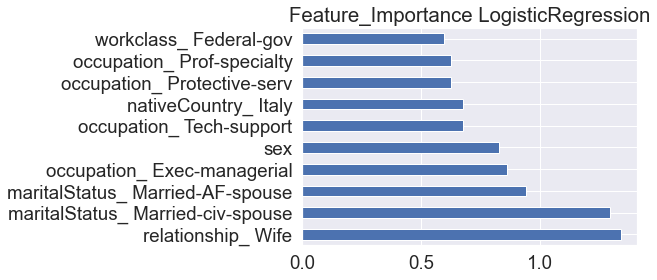

In [31]:
importance = logreg.coef_[0]

pd.Series(importance, index=X_train.columns).nlargest(10).plot(kind='barh')

plt.title("Feature_Importance LogisticRegression")
plt.show()

### Random Forest Classifier

In [32]:
# Random forest 

rfc = RandomForestClassifier(
                            criterion = "gini",
                            max_depth = 6,
                            max_features = "auto",
                            min_samples_leaf = 2,
                            n_estimators = 500,
                            verbose = 0
                            ).fit(X_train, Y_train)

rfc.score(X_train, Y_train)

predRFC = rfc.predict(X_test)

print(confusion_matrix(Y_test, predRFC))

print('\n')

print(classification_report(Y_test, predRFC))

[[11015   345]
 [ 1987  1713]]


              precision    recall  f1-score   support

           0       0.85      0.97      0.90     11360
           1       0.83      0.46      0.59      3700

    accuracy                           0.85     15060
   macro avg       0.84      0.72      0.75     15060
weighted avg       0.84      0.85      0.83     15060



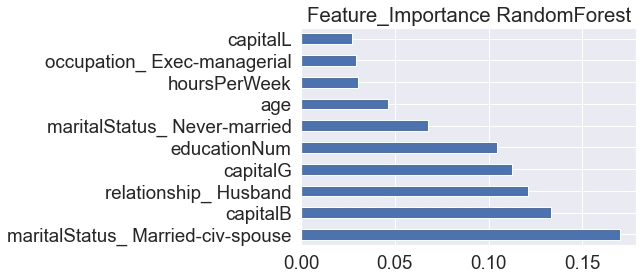

In [33]:
feat_importancesrfc = pd.Series(rfc.feature_importances_, index=X_train.columns).nlargest(10).plot(kind='barh')

plt.title("Feature_Importance RandomForest")
plt.show()

### Gradient Boosting Classifier

In [34]:
# GRADIENT BOOSTING

gbc = GradientBoostingClassifier(
                                loss ="exponential",
                                learning_rate = 0.6,
                                max_depth=3,
                                max_features = "auto",
                                n_estimators = 100
                                ).fit(X_train, Y_train)

gbc.score(X_test, Y_test)

predgbc = gbc.predict(X_test)

print(confusion_matrix(Y_test, predgbc))

print('\n')

print(classification_report(Y_test, predgbc))

[[10651   709]
 [ 1260  2440]]


              precision    recall  f1-score   support

           0       0.89      0.94      0.92     11360
           1       0.77      0.66      0.71      3700

    accuracy                           0.87     15060
   macro avg       0.83      0.80      0.81     15060
weighted avg       0.86      0.87      0.87     15060



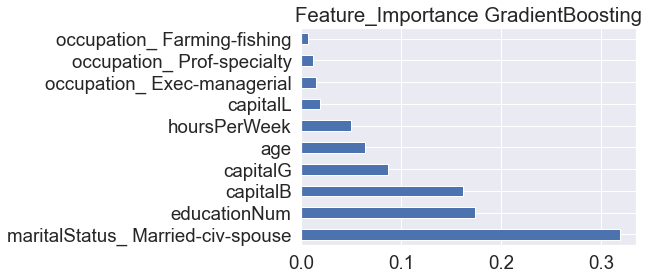

In [35]:
feat_importancesGBC = pd.Series(gbc.feature_importances_, index=X_train.columns).nlargest(10).plot(kind='barh')

plt.title("Feature_Importance GradientBoosting")
plt.show()

### Extra Trees Classifier

In [36]:
# EXTRA TREES CLASSIFIER

etc = ExtraTreesClassifier(
                           bootstrap = False,
                           class_weight = None,
                           criterion = "gini",
                           max_depth = None,
                           max_features = 10,
                           min_samples_split = 3,
                           n_estimators = 100,
                           ).fit(X_train, Y_train) 

etc.score(X_train, Y_train)

predETC = etc.predict(X_test)

print(confusion_matrix(Y_test, predETC))

print('\n')

print(classification_report(Y_test, predETC))

[[10362   998]
 [ 1466  2234]]


              precision    recall  f1-score   support

           0       0.88      0.91      0.89     11360
           1       0.69      0.60      0.64      3700

    accuracy                           0.84     15060
   macro avg       0.78      0.76      0.77     15060
weighted avg       0.83      0.84      0.83     15060



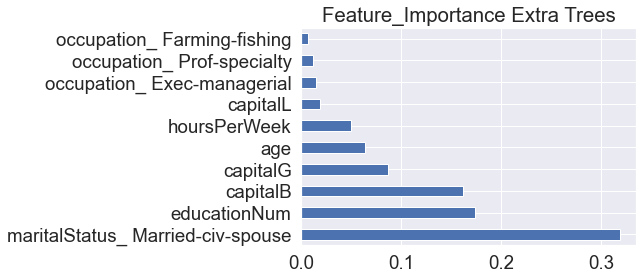

In [37]:
feat_importancesETC = pd.Series(gbc.feature_importances_, index=X_train.columns).nlargest(10).plot(kind='barh')

plt.title("Feature_Importance Extra Trees")
plt.show()

In [38]:
#Paramaetros para otimização dos modelos usados acima, tentando obter melhores resultados dos mesmos

#Decision tree parameters 
clf_params = {
             'criterion': ['entropy', 'gini'], # melhor parametro "entropy"
             'random_state': [0],
             'min_samples_split': [2], #melhor parametro 2
             'max_depth': [10], # melhor parametro 10
             'max_leaf_nodes': list(range(2, 100)), #melhor parametro 93
             'min_samples_split': [2, 3, 4], #melhor parametro 2
             }

#Logistic Regression parameters Ambos
lg_params = {
            'random_state': [0],
            'penalty':['l1','l2','elasticnet', 'none'], #melhor parametro "l2"
            'max_iter': [100, 200, 500, 1000], #melhor parametro 
            'C': [0.5, 1, 5, 10], #melhor parametro 1
            }

# Random Forest parameters 
rf_params = {
            'n_estimators': [500] , 
            'max_depth': [4,6,8,10,12,14], # melhor parametro 10
            'min_samples_leaf': [2,4,6,8], #nelhor parametro 2
            'max_features': ["auto","log2","sqrt"], #melhor parametro "auto"
            'verbose': [0],
            'criterion': ["entropy", "gini"], # melhor parametro "gini"
            }

# Support Vector Classifier parameters Ambos 
svc_params = {
             'kernel':['rbf'], #melhor parametro rbf
             'C':(1,0.5,0.75) , #melhor parametro 1
             'gamma' : ["scale"], #melhor parametro "scale"
             'tol' : [1e-3, 1e-4, 1e-5,1e-6], #melhor parametro 1e-4
              }

#Gradient Boosting Classifier parameters 
gnb_params = {
             "loss":["deviance","exponential"], #melhor parametro "exponential"
             "learning_rate": np.arange(0.5, 0.76, 0.01), # melhor parametro 0.51
             "max_depth":[1,3,5,8], # melhor parametro 3
             "max_features":["auto","log2","sqrt", None], # melhor parametro "auto"
             "criterion": ["friedman_mse", "mse"], # melhor parametro "friedman_mse"
             "n_estimators":[100],
             }

# Gaussian Naive Baeyes parameters  
gauss_params = {
               "var_smoothing": [1e-09], 
               }

# Extra Trees Classifier parameters 
etc_params = {
               'n_estimators' :[100],
               'criterion': ['entropy', 'gini'], # melhor parametro "gini"
               'max_depth' : [5,None],
               'min_samples_split': [2,3],
               'max_features' : ['auto','sqrt','log2',10],
               'bootstrap': ['True'],
               'oob_score' : ['True','False'],   #só funciona com bootstrap = true, testar à parte
               'max_samples' : [None, 5,10],     #só funciona com boostrap = True
               'warm_start' :['True','False'],
               'class_weight': ['balanced',None],
             }

score = 'accuracy'

### Tunning de alguns modelos 

Nota: Demora algum tempo a correr, por isso todos os parametros utilizados estão acima definidos e todos os modelos têm os parâmetros com que obtiveram melhores acurácias, não sendo necessário correr este código. Contudo, está presente porque fez parte do desenvolvimento deste trabalho. 

In [40]:
# Otimização de parametros no modelo Gradient Boosting 

#grid_gbc = GridSearchCV(gbc, gnb_params ,scoring=score, n_jobs=-1).fit(X_train, Y_train)

In [ ]:
#pd.DataFrame(grid_gbc.cvresults)[['params','rank_test_score','mean_test_score']]

In [ ]:
#grid_gbc.best_params_

In [ ]:
# Otimização de parametros no modelo RandomForest

#grid_rfc = GridSearchCV(rfc, rf_params , scoring = score)

#grid_rfc.fit(X_train,Y_train)


In [ ]:
#pd.DataFrame(grid_rfc.cv_results_)[['params','rank_test_score','mean_test_score']]

In [ ]:
#grid_rfc.best_params_

In [ ]:
#Otimização de parametros para o modelo Decision Tree

#grid_dt = GridSearchCV(clf, clf_params , scoring = score)

#grid_dt.fit(X_train,Y_train)


In [ ]:
#pd.DataFrame(grid_dt.cv_results_)[['params','rank_test_score','mean_test_score']]

In [ ]:
#grid_dt.best_params_

In [ ]:
# Otimização de parametros no modelo Extra Trees Classifier

#grid_etc = GridSearchCV(etc, etc_params ,scoring=score, n_jobs=-1).fit(X_train, Y_train)

In [ ]:
#pd.DataFrame(grid_etc.cvresults)[['params','rank_test_score','mean_test_score']]

In [ ]:
#grid_etc.best_params_

In [42]:
classifiers = {
              "Gaussian NB": gnb,
              "LogisiticRegression": logreg,
              "KNearest": knn,
              "Support Vector": svm,
              "DecisionTree": clf,
              "RandomForest": rfc,
              "GradientBoosting": gbc,
              "ExtraTree": etc,
              }

### Stacked Assembly de modelos

Depois de testar um melhor resultado com o assembly dos modelos, testamos 3 configurações diferentes :
   - Apenas os TOP 3 de modelos na stack, pela sua accuracy;
   - BOT 2 de modelos retirados da stack, pela sua accuracy;
   - Todos os modelos.

Concluimos que o melhor resultado advem de retirar os 2 piores modelos, ficando com os restantes.

In [43]:
#Stacked assembly de modelos para tentar obter um melhor resultado na previsão da classe salarial

estimators = list(classifiers.items())

estimators.pop(0)
estimators.pop(2)

stackC = StackingClassifier( 
                            estimators = estimators, 
                            final_estimator = gbc, 
                            cv = 3, 
                            n_jobs = -1,
                            stack_method = "predict"
                            ).fit(X_train, Y_train)

stackC.score(X_test,Y_test)

predStackC = stackC.predict(X_test)

print(confusion_matrix(Y_test, predStackC))

print('\n')

print(classification_report(Y_test, predStackC))

[[10679   681]
 [ 1292  2408]]


              precision    recall  f1-score   support

           0       0.89      0.94      0.92     11360
           1       0.78      0.65      0.71      3700

    accuracy                           0.87     15060
   macro avg       0.84      0.80      0.81     15060
weighted avg       0.86      0.87      0.86     15060



### Matrizes de Confusão

Nesta secção apresentamos as matrizes de confusão, que nos ajudam a perceber melhor qual foi a classificação atribuida aos indívíduos prevista pelos nossos modelos, no dataset de teste.

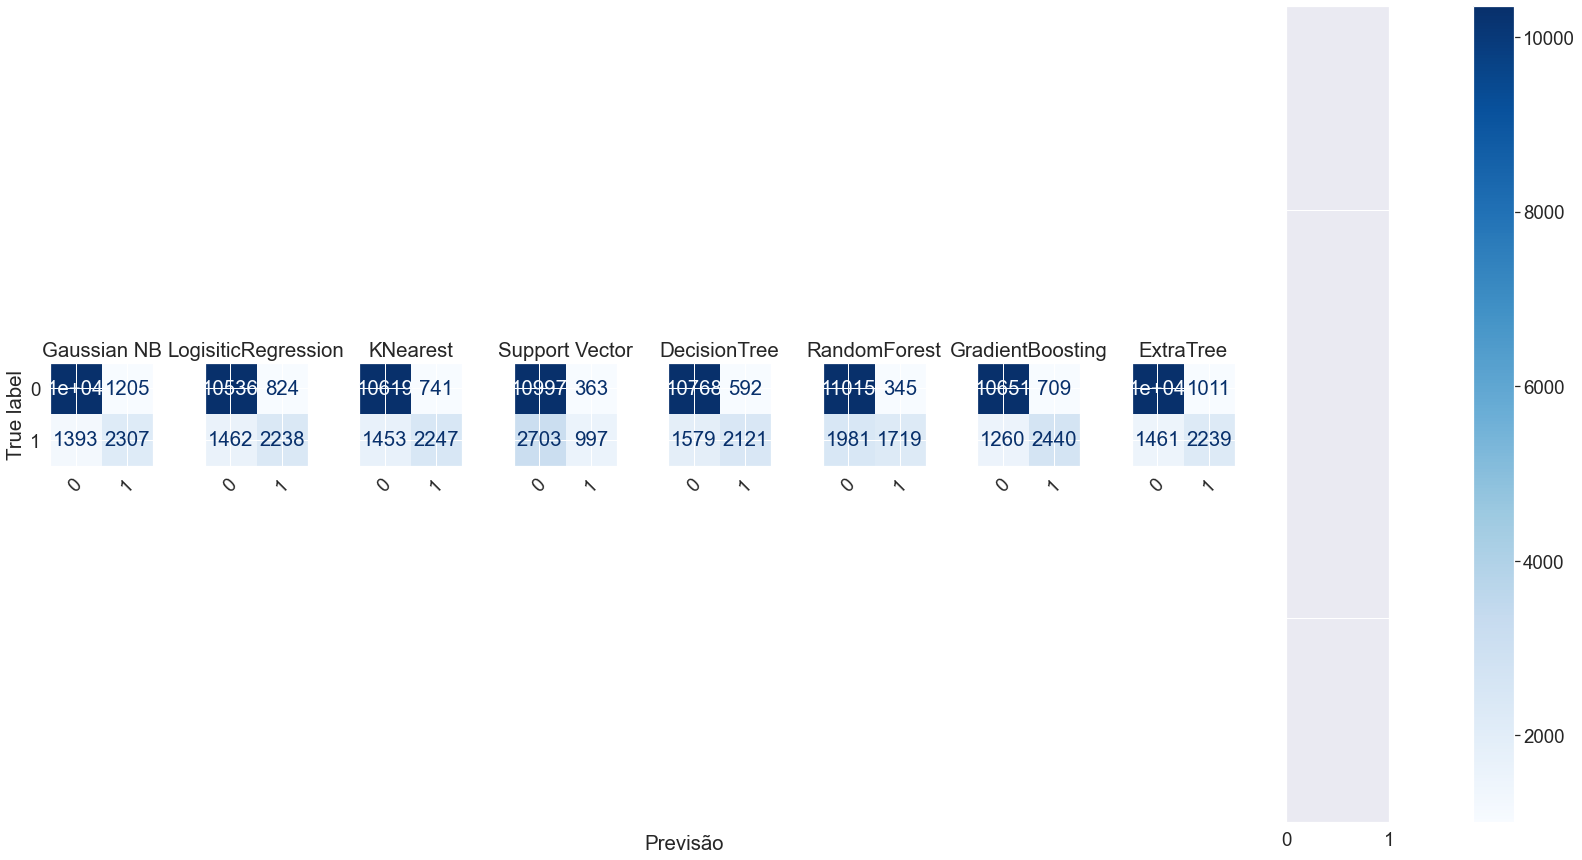

In [44]:
f, axes = plt.subplots(1, 9, figsize=(30, 15), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X_train, Y_train).predict(X_test)
    cf_matrix = confusion_matrix(Y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], xticks_rotation=45, cmap=plt.cm.Blues)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Previsão', ha='left')
plt.subplots_adjust(wspace=0.50, hspace=0.5)

f.colorbar(disp.im_, ax=axes)
plt.show()

In [45]:
# Resultados dos modelos
results = []
name = []

name.append("KNN")
results.append(accuracy_score(Y_test, predKnn))
print("Acurácia KNN:",accuracy_score(Y_test, predKnn))

name.append("CLF")
results.append(accuracy_score(Y_test, predclf))
print("\nAcurácia DT:",accuracy_score(Y_test, predclf))

name.append("SVM")
results.append(accuracy_score(Y_test, predsvm))
print("\nAcurácia SVM:",accuracy_score(Y_test, predsvm))

name.append("GNB")
results.append(accuracy_score(Y_test, predGNB))
print("\nAcurácia GNB:",accuracy_score(Y_test, predGNB))

name.append("LG")
results.append(accuracy_score(Y_test, predLG))
print("\nAcurácia LG:",accuracy_score(Y_test, predLG))

name.append("RFC")
results.append(accuracy_score(Y_test, predRFC))
print("\nAcurácia RFC:",accuracy_score(Y_test, predRFC))

name.append("GBC")
results.append(accuracy_score(Y_test, predgbc))
print("\nAcurácia GBC:",accuracy_score(Y_test, predgbc))

name.append("ETC")
results.append(accuracy_score(Y_test, predETC))
print("\nAcurácia ETC:",accuracy_score(Y_test, predETC))

name.append("SC")
results.append(accuracy_score(Y_test, predStackC))
print("\nAcurácia SC:",accuracy_score(Y_test, predStackC))

Acurácia KNN: 0.8543160690571049

Acurácia DT: 0.8558432934926958

Acurácia SVM: 0.7964143426294821

Acurácia GNB: 0.8274900398406374

Acurácia LG: 0.848207171314741

Acurácia RFC: 0.8451527224435591

Acurácia GBC: 0.8692563081009296

Acurácia ETC: 0.8363877822045153

Acurácia SC: 0.8689907038512616


### Gráfico com as acurácias dos modelos, entre o teste e a previsão 

<ipython-input-46-8c9e6f424ddb>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(name,fontsize= 13)


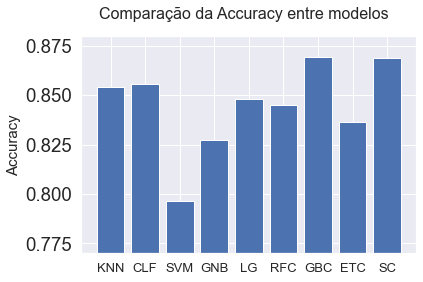

In [46]:
#Plot com as Acurácias dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Accuracy entre modelos', fontsize = 16)
ax = fig.add_subplot(111)
plt.bar(name,results)
ax.set_xticklabels(name,fontsize= 13)
plt.ylabel("Accuracy",fontsize=15)
plt.gca().set_ylim([0.77,0.88])

plt.show()

## Conclusão e análise dos resultados obtidos

Após análise dos resultados obtidos pelos vários modelos testados, podemos concluir que todos os modelos são capazes de prever se um indivíduo recebe mais ou menos de 50k anuais com uma percentagem sucesso entre os 79%-87%. Assim, concluímos que todos os modelos se tornaram eficazes no treino e previsão da classe salarial de um indivíduo. 

Implementamos também um modelo que agrega todos os modelos treinados (*Stacked Assembly*) , mas este não se mostrou mais eficaz a prever a classe salarial de um determinado funcionário, tendo apenas atingido 86,89% de acurácia, estando bastante perto do nosso melhor modelo.

Apesar de considerarmos que todos têm um aproveitamento positivo, todos diferem na sua eficácia. Assim, consideramos que o modelo ***Gradient Boosting Classifier*** é o mais eficaz, uma vez que apresenta o maior valor de acurácia (86,93%), critério que consideramos para avaliar a performance dos modelos.